![zebra](images/zebra.jpg)

# 6. Módulo Scipy

__Conteúdo:__

Para a _data science_, a utilização de métodos numéricos é imprescindível, não apenas o método, mas qual utilizar. Explicamos anteriormente sobre e como ela facilita a manipulação de dados. Agora, partiremos para o _scipy_. A biblioteca do _Scipy_ é muito vasta, portanto, trataremos aqui apenas de alguns métodos numéricos importantes à engenharia. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp 

## 6.1. Resolução de Sistemas Lineares e Álgebra Linear

Para a resolução de Sistemas Lineares e , utiliza-se a biblioteca `linalg`. Pode-se pensar que é semelhante à do `numpy`. Entretanto, com a do `scipy`, possui todas as funções existentes em `numpy` e mais algumas.`scipy` também sempre recorre à BLAS/LAPACK.  

<h3><center>Exemplo 1: Resolução de uma Treliça</center></h3>

![trelica](images/trelica.png)

![forcas](images/forcas.png)

In [6]:
A = np.genfromtxt('data\A.txt')
b = np.genfromtxt('data\B.txt')

A,b

(array([[ 0.866,  0.   , -0.5  ,  0.   ,  0.   ,  0.   ],
        [ 0.5  ,  0.   ,  0.866,  0.   ,  0.   ,  0.   ],
        [-0.866, -1.   ,  0.   , -1.   ,  0.   ,  0.   ],
        [-0.5  ,  0.   ,  0.   ,  0.   , -1.   ,  0.   ],
        [ 0.   ,  1.   ,  0.5  ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   , -0.866,  0.   ,  0.   , -1.   ]]),
 array([    0., -1000.,     0.,     0.,     0.,     0.]))

In [7]:
import scipy.linalg as spal

x = spal.solve(A,b)

x

array([-5.00022001e+02,  4.33019053e+02, -8.66038106e+02, -4.80747723e-14,
        2.50011000e+02,  7.49989000e+02])

## 6.2. Resolução de Sistemas Não-Lineares

_Scipy_ possui um bom suporte para resolução de sistemas não lineares também. No módulo `scipy.optimize` há uma vasta quantidade de métodos que podem ser consultados aqui: https://docs.scipy.org/doc/scipy/reference/optimize.nonlin.html. No entanto, caso só deseje um solucionador, a função `solve`já é o suficiente. 

<h3><center>Exemplo 2a: Mols de Uma Mistura Reativa </center></h3>

Dada a reação:

<center> $2A + B \rightarrow C$ <center>

Seu equilíbrio pode ser caracterizado por: 

<center> $K = \dfrac{c_c}{c_a^2 c_b}$ <center>

K depende da temperatura. Para se deduzir o acréscimo de substância c com o tempo, temos:

<center> $K = \dfrac{c_{c0} + x}{(c_{a0}-2x)^2 (c_{b0}-x)}$ <center>

Considerando Ca0 = 42, Cb0 = 28, Cc0 = 4. Para uma constante de equilíbrio de 0,016, o número de mols de c deve ser encontrada por métodos numéricos, e a equação deve adequada em sua forma residual:

<center> $0 = \dfrac{c_{c0} + x}{(c_{a0}-2x)^2 (c_{b0}-x)} - K$ <center>

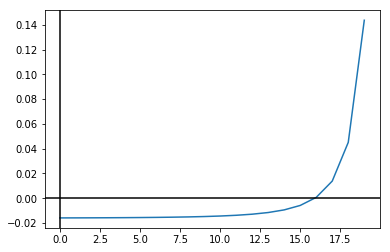

In [8]:
from scipy.optimize import fsolve 


def eq1(x):
    ca = 42
    cb = 28
    cc = 4
    K  = 0.016
    return (cc + x)/((ca-2*x)**2*(cb-x)) - K

X = np.r_[0:20:1]

plt.figure()
plt.plot(X,eq1(X))
plt.axhline(0,color='k')
plt.axvline(0,color='k')

In [9]:
fsolve(eq1,16)

array([15.92299402])

Mas e se quisesse saber como que x varia de acordo com a constante de equilíbrio (Temperatura) ? 

In [16]:
def eq2(x,K):
    ca = 42
    cb = 28
    cc = 4
    return (cc + x)/((ca-2*x)**2*(cb-x)) - K

K = [0.004,0.008,0.012,0.016]



plt.figure()
for k in K:
    plt.plot(X,eq2(X,k))
plt.axhline(0,color='k')
plt.axvline(0,color='k')

A função `fsolve` só resolve sistemas ou equações com um parâmetro, para variar mais que um, temos que __"transformar"__ a função em uma variável. Aqui também aproveitaremos a resposta da resposta antecedente como chute inicial, o que permite uma convergência mais rápida.

In [17]:
S = []
x0 = 13
for k in K:
    x0 = fsolve(lambda x: eq2(x,k),x0)
    S.append(x0)

In [20]:
plt.figure()
plt.plot(K,S,'o')

<h3><center>Exemplo 2b: Malha Fechada (Loop Closure) para Solução de Cinemática de Mecanismos </center></h3>

Dado o mecanismo:

![mechanism](images/mechanism.png)

Pelo método da malha fechada, tem-se:

<center> $150 cos\theta_1 + 180 cos \theta_2 − 200 cos \theta_3 = 200$ </center> 
<center> $150 sin \theta_1 + 180 sin \theta_2 − 200 sin \theta_3 = 0$  </center>

Admitindo-se o conhecimento do $\theta_1$, tem-se duas equações e duas incógnitas. 

In [27]:
def eq3(inc,args):
    o2,o3 = inc
    o1    = args
    s1 = 150*np.cos(o1) + 180*np.cos(o2) - 200*np.cos(o3) - 200
    s2 = 150*np.sin(o1) + 180*np.sin(o2) - 200*np.sin(o3)
    
    return [s1,s2]

In [4]:
S = []
ARGS = np.deg2rad(np.r_[0:360:360j])
x0   = np.deg2rad([80,100])
for args in ARGS:
    x0 = fsolve(lambda inc: eq3(inc,args),x0)
    S.append(x0)

NameError: name 'fsolve' is not defined

In [46]:
S = np.array(S).T

S.shape

(2, 360)

In [47]:
plt.figure()
plt.plot(ARGS,S[0])
plt.plot(ARGS,S[1])

Para a dedução das velocidades e acelerações, basta aplicar uma derivada numérica em relação ao ângulo sobre o vetor (1x para velocidade, 2x para aceleração) e dividir pela velocidade angular. Lembre-se que a derivada `numpy.grandient` é de primeira ordem nos cantos, portanto, não muito preciso para a aceleração, crie dois pontos de não interesse em cada lado da curva, assim terá resultados mais precisos.

## 6.3. Integração Numérica

Em _Python_ podemos integrar tanto em dados quanto funções. Para dados, Existem a regra do trapézio e a 1/3 de Simpson e Romberg(somente se igaulmente espaçados), para funções, integral de Romberg e Guadratura de Gauss.

### 6.3.1. Integração em Dados 

Dada uma função, deduzir o valor da integral nos limites estabelecidos:

<center> $f(x) = x(1 + sin x)$ </center>

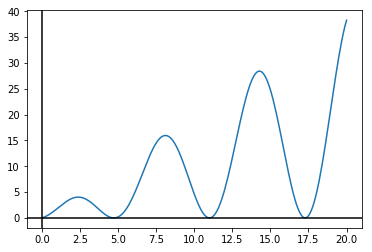

In [3]:
def eq4(x): return x*(1+ np.sin(x))

x = np.r_[0:20:201j]
y = eq4(x)

plt.plot(x,y)
plt.axhline(0,color = 'k')
plt.axvline(0,color = 'k')

Graficamente, a regra do trapézio pega pontos do gráfico e os interpola linearmente criando diversos trapézios cuja área correponde aproximada à integral. Abaixo, uma ilustração de como ocorre a integração.

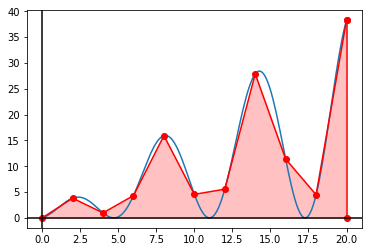

In [5]:
fig,ax = plt.subplots(1,1)


ax.plot(x,y)
ax.plot(x[::20],y[::20],marker='o',color='r',ls='-')
ax.plot([x[-1]]*2,[y[-1],0],marker='o',color='r',ls='-')
ax.fill_between(x[::20],y[::20],0,color='#FFC1C1')
ax.axhline(0,color = 'k')
ax.axvline(0,color = 'k')

Já a regra de 1/3 de Simpson, ela faz uma interpolação quadrática, abrangendo uma área maior da real função.

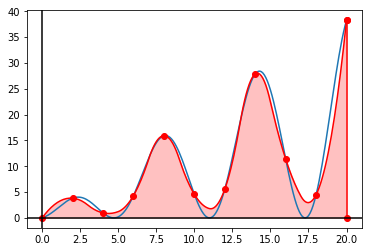

In [8]:
from scipy.interpolate import interp1d

f_new = interp1d(x[::20],y[::20],kind='quadratic')

fig,ax = plt.subplots(1,1)
ax.plot(x,y)
ax.plot(x[::20],y[::20],marker='o',color='r',ls='None')
ax.plot(x,f_new(x),color='r')
ax.plot([x[-1]]*2,[y[-1],0],marker='o',color='r',ls='-')
ax.fill_between(x,f_new(x),0,color='#FFC1C1')
ax.axhline(0,color = 'k')
ax.axvline(0,color = 'k')

In [6]:
from scipy.integrate import trapz,simps

INT_T = trapz(y[::20],x[::20])
INT_S = simps(y[::20],x[::20])
INT_A = 200 + np.sin(20) - 20*np.cos(20)


INT_T,INT_S,INT_A

(196.04880741957496, 190.7693693375861, 192.7513040144598)

### 6.3.2. Integração de Funções

Quando temos uma função ascessível, A integração pode ser mais precisa e eficiente, não necessitando de muitos dados para melhores integrações. A Quadratura Gaussiana (`quad`) utiliza de pontos inteligentes escolhidos entre o intervalos, ponderando-os. Já  a integração de Romberg (`romberg`), aplica uma sucessiva regra de trapézios reduzindo os passos e, a partir da Extrapolação de Richardison, aproveita-se o erro estimado das integrações e garante um resultado mais preciso.

In [63]:
from scipy.integrate import quad,romberg


INT_Q,_ = quad(eq4,0,20)
INT_R = romberg(eq4,0,20)

INT_T,INT_S,INT_A,INT_Q,INT_R

(193.5230923343556,
 192.68118730594915,
 192.7513040144598,
 192.7513040144598,
 192.75130401446242)

### 6.3.3. Integração Dupla e Tripla 

É possível realizar a integração dupla e tripla usando _Scipy_ com as funções `dblquad` e `tplquad`. Abaixo, exemplos:

$ f(x,y) = x.y^2$, no intervalo $0<x<2$ e $0<y<1$.

In [76]:
from scipy.integrate import dblquad,tplquad

def eq5(y,x): return x*y**2

INT_DBN,_ = dblquad(eq5,0,2,lambda x: 0,lambda x: 1)
INT_DBA = 2**2*1**3/6

INT_DBN,INT_DBA

(0.6666666666666667, 0.6666666666666666)

$ f(x,y) = x.y.z$, no intervalo $1<x<2$ e $2<y<3$ e $0<z<1$.

In [85]:
def eq5(z,y,x): return x*y*z

INT_TPN,_ = tplquad(eq5,1,2,lambda x: 2,lambda x: 3,lambda x,y: 0,lambda x,y:1)
INT_TPA   =  3*5*1/8

INT_TPN,INT_TPA

(1.8750000000000002, 1.875)

## 6.5. Solução de Equações Diferenciais Ordinárias